In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *
import matplotlib.pyplot as plt

In [3]:
data_path = Path('/content/gdrive/MyDrive/ENEL 400/Data/')
data_types = ['Ambulance_spec','Other_spec']

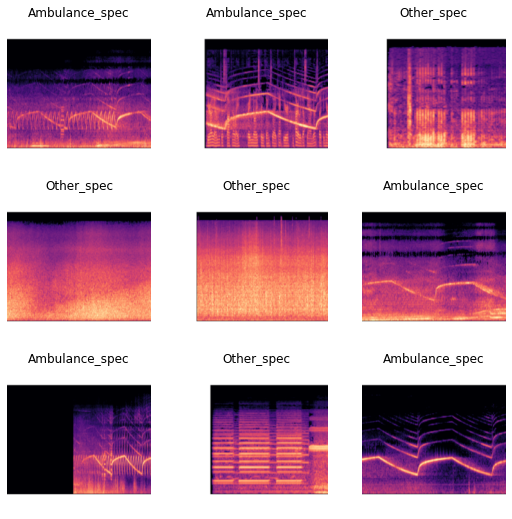

In [7]:
specs = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.15, seed=33),
                  item_tfms=Resize(224),
                   get_y=parent_label)

dls = specs.dataloaders(data_path)
dls.train.show_batch()

In [8]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

In [9]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,time
0,1.302526,0.777234,0.600000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.294919,0.786207,0.600000,00:04
1,1.278838,0.799749,0.600000,00:04
2,1.104579,0.736173,0.600000,00:04
3,0.977039,0.651214,0.600000,00:04
4,0.870426,0.546191,0.666667,00:04
5,0.791704,0.462921,0.866667,00:04
6,0.730780,0.426623,0.866667,00:04
7,0.663302,0.388655,0.866667,00:04
8,0.604769,0.356113,0.866667,00:04
9,0.563224,0.303853,0.866667,00:04


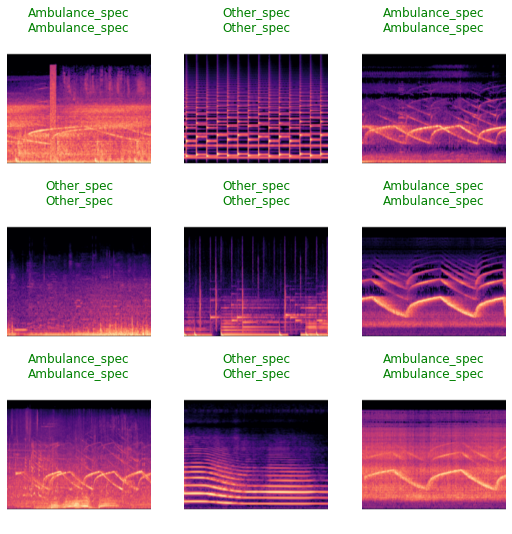

In [10]:
learn.show_results()

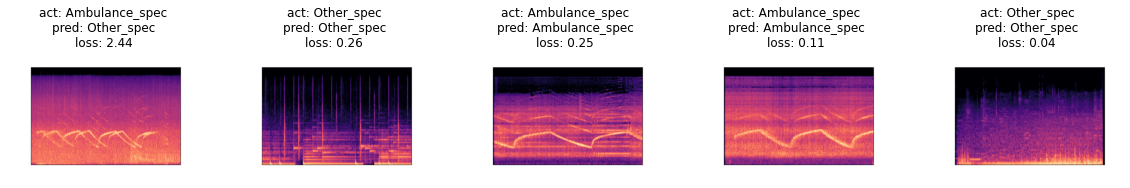

In [11]:
k=5
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses(k)
predicteds = interp.preds[idxs].argmax(axis=1)
fig, axs = plt.subplots(nrows=1, ncols=k, figsize=(20, 10))

for ax, id, loss, pred in zip(axs, idxs, losses, predicteds):
    img, actual = dls.valid_ds[id]
    img.show(ctx=ax)
    ax.set_title(f'act: {dls.vocab[actual.item()]}\npred: {dls.vocab[pred]}\nloss: {loss:.2f}')

In [14]:
learn.export(data_path/'Model'/'specmodel_resnet18.pkl')

In [4]:
learn = load_learner(data_path/'Model'/'specmodel_resnet18.pkl')

In [11]:
learn.predict(data_path/'spec_test_is_ambulance.png')

('Ambulance_spec', TensorBase(0), TensorBase([1.0000e+00, 4.6825e-06]))